# **1. Preâmbulo**

O que veremos?

- Implementação de cálculo e plotagem de histogramas

Recomendações:

- Caso já não tenha feito, assista os vídeos de nivelamento de Python disponíveis no Moodle
- Se já possui noção da linguagem, mas se considere sem prática, assista, em especial, os últimos vídeos do material em questão
- Lembre-se de **salvar** de tempos em tempos seu Notebook. Ao contrário da maioria das ferramentas da plataforma da Google, o Colab necessita de salvamento de tempos em tempos

## **1.1 Importações de módulos Python (bibliotecas)**

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

### **Mudança de path**

Ao executar a linha de código abaixo, não será mais necessário adicionar `path + ` antes dos nomes dos arquivos quando formos abrir ou salvar.

Ajuste a string do caminho para onde você salvou sua cópia do Notebook.

In [2]:
os.chdir('/content/drive/MyDrive/2023 1/PDI/Notebooks-aulas/Histogramas/')

# **2. Funções que implementam cálculo e plotagem de histogramas**

In [3]:
# tipos: 'b' --> básico, 'p' --> probabilidades, 'c' --> cdf
def histograma(img, tipo='p'):
  arr = np.asarray(img).astype(int)

  arrCinza = np.dot(arr, np.array([0.299, 0.587, 0.144]).T)
  arrCinza = arrCinza.round().astype(int).clip(0,255) # clip poda valores dentro dos limites

  # Histograma básico
  H = np.zeros((4, 256)) # 3 canais + cinza x 256 níveis de intensidade

  for k in range(256):
    for c in range(3):
      H[c,k] = (arr[:,:,c] == k).sum()
    H[3,k] = (arrCinza == k).sum() # Contagem no nível k em cinza

  if tipo == 'b':
    return H

  # Histograma de probabilidades
  H /= arr.shape[0]*arr.shape[1]

  if tipo == 'p':
    return H

  # Histograma de probabilidades acumuladas (CDF)
  CDF = np.zeros_like(H)
  for k in range(256):
    soma = np.sum(H[:, :k+1], axis=1)
    CDF[:,k] = soma

  # Alternativa:
  # CDF = np.cumsum(H, axis=1)

  return CDF

In [4]:
def plot_histograma_individual(h, canal='Cinza', tipo='de Probabilidades'):
  x = np.arange(0, 256)
  plt.bar(x, h)
  plt.title('Histograma %s do canal %s' % (tipo, canal))
  plt.xlabel('Níveis')
  plt.ylabel('Ocorrências')
  plt.tight_layout()
  plt.show()

In [12]:
def plot_histogramas(img=None, H=None, tipo='p'):
  # Assegura que pelo menos img ou H foram passados, e apenas um deles
  a = img is None
  b = H is None
  assert (a and not b) or (not a and b)

  # Se apenas imagem foi informada, computa o histograma
  if H is None:
    H = histograma(img, tipo)

  # Cria um vetor com os níveis de intensidade (k)
  k = np.arange(0, 256)

  # Estruturas de dados auxiliares para decoração da plotagem
  cores = ['red', 'green', 'blue', 'gray']
  nomes = ['Vermelho', 'Verde', 'Azul', 'Cinza']
  tipos = {'p': 'de Probabilidades', 'b': 'Básicos', 'c': 'de Probabilidades Acumuladas'}

  # Cria um plot composto por múltiplos subplots
  # Neste caso, o plot será 1x4
  # fig representa a figura que será gerada e ax é um array 1x4 contendo as áreas de plotagem de cada subgráfico
  fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(24,6))

  # Para cada canal (R,G,B e Cinza), cria um subplot
  for c in range(4):
    ax[c].bar(k, H[c,:], color=cores[c])
    ax[c].set(title='Canal %s' % nomes[c])
    ax[c].set(xlabel='Níveis')
    ax[c].set(ylabel='Ocorrências')

  # Ajustes finais e exibição
  plt.suptitle('Histogramas %s' % tipos[tipo])
  plt.show()


#### **Testando a função de cálculo de histogramas e a função `plot_histograma_individual`**

In [7]:
img = Image.open('capivara_lago.png')

H = histograma(img, 'b')
P = histograma(img, 'p')
C = histograma(img, 'c')

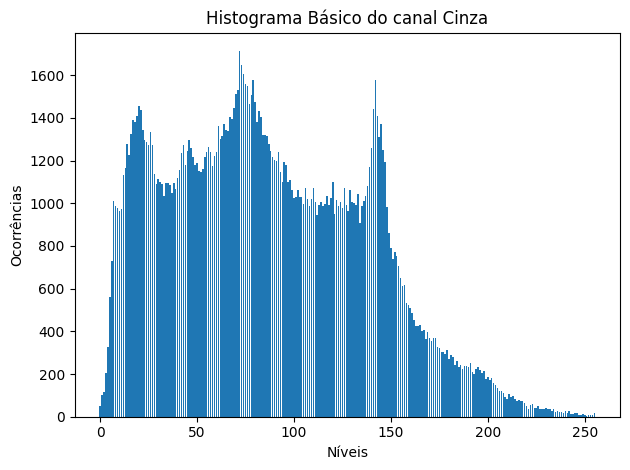

In [8]:
plot_histograma_individual(H[3,:], canal='Cinza', tipo='Básico')

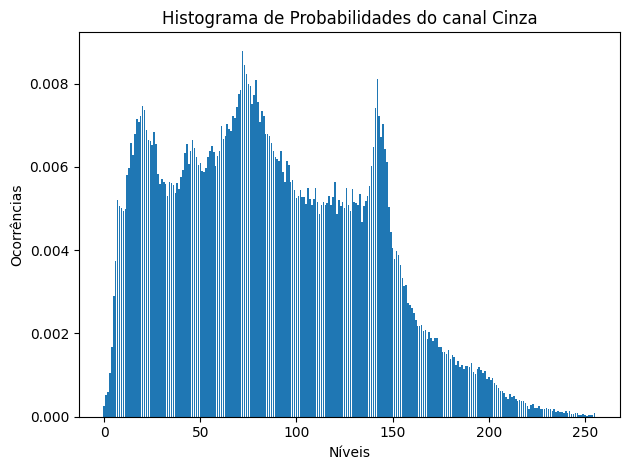

In [9]:
plot_histograma_individual(P[3,:], canal='Cinza', tipo='de Probabilidades')

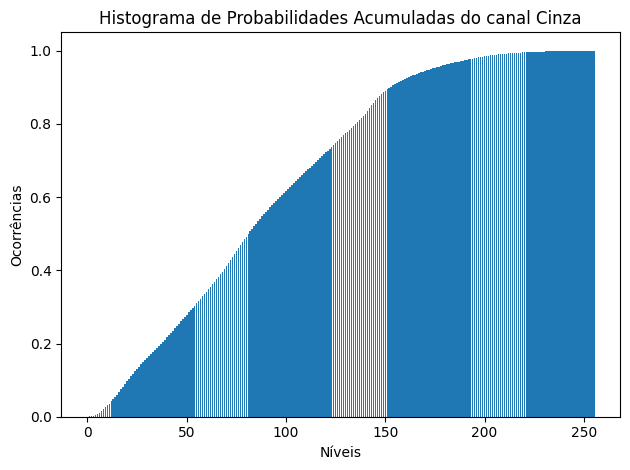

In [10]:
plot_histograma_individual(C[3,:], canal='Cinza', tipo='de Probabilidades Acumuladas')

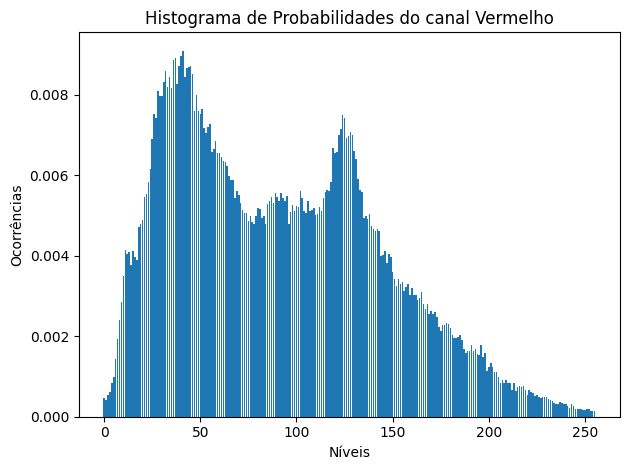

In [11]:
plot_histograma_individual(P[0,:], canal='Vermelho', tipo='de Probabilidades')

#### **Testando a função `plot_histogramas`**

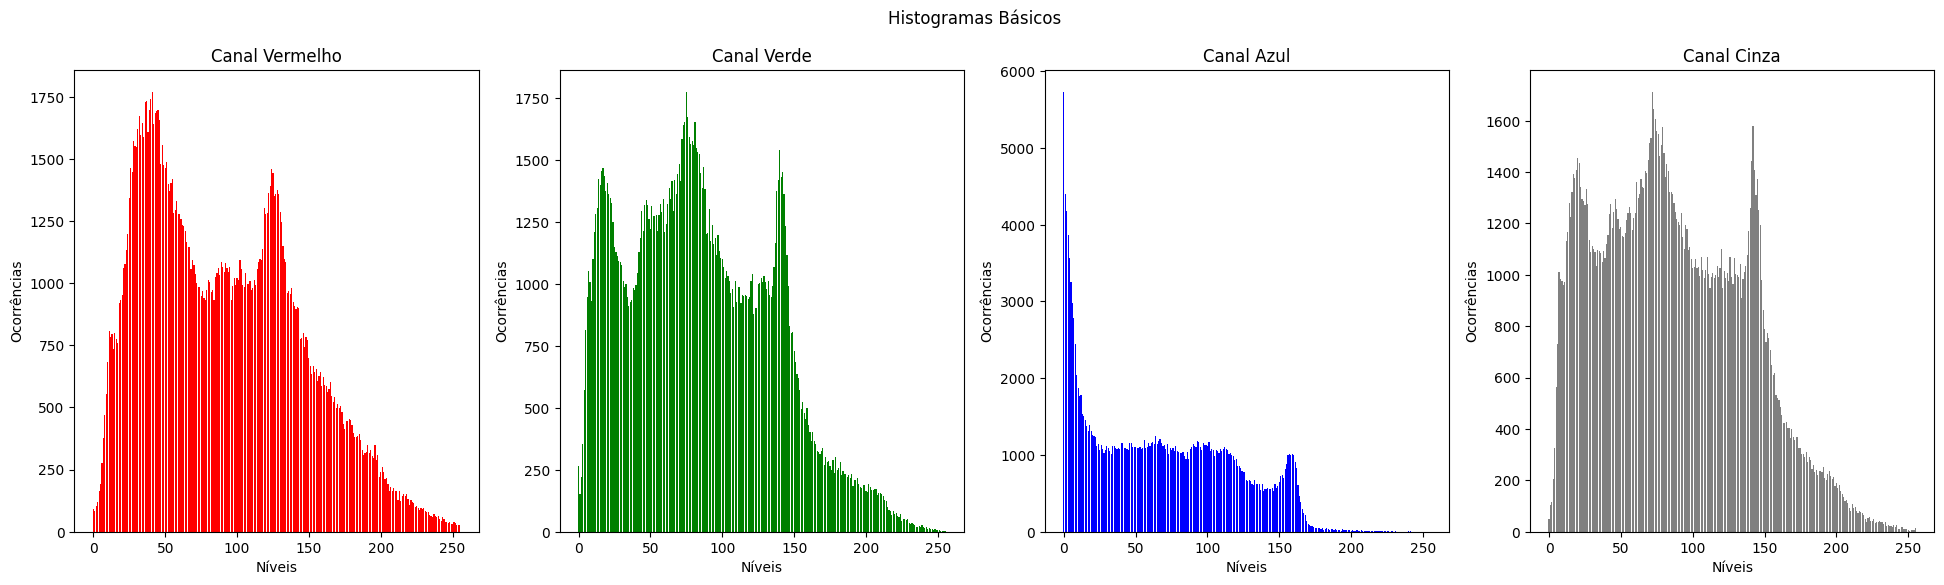

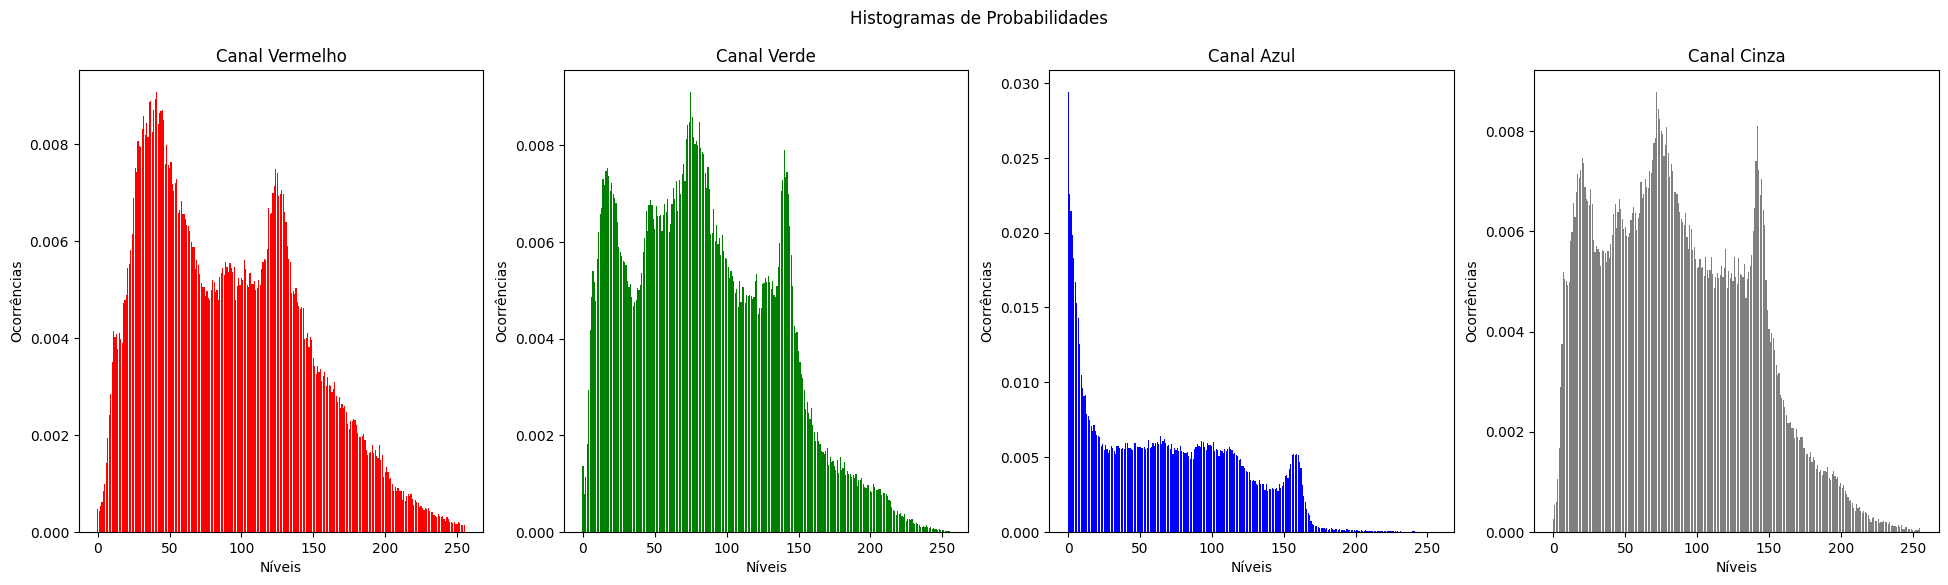

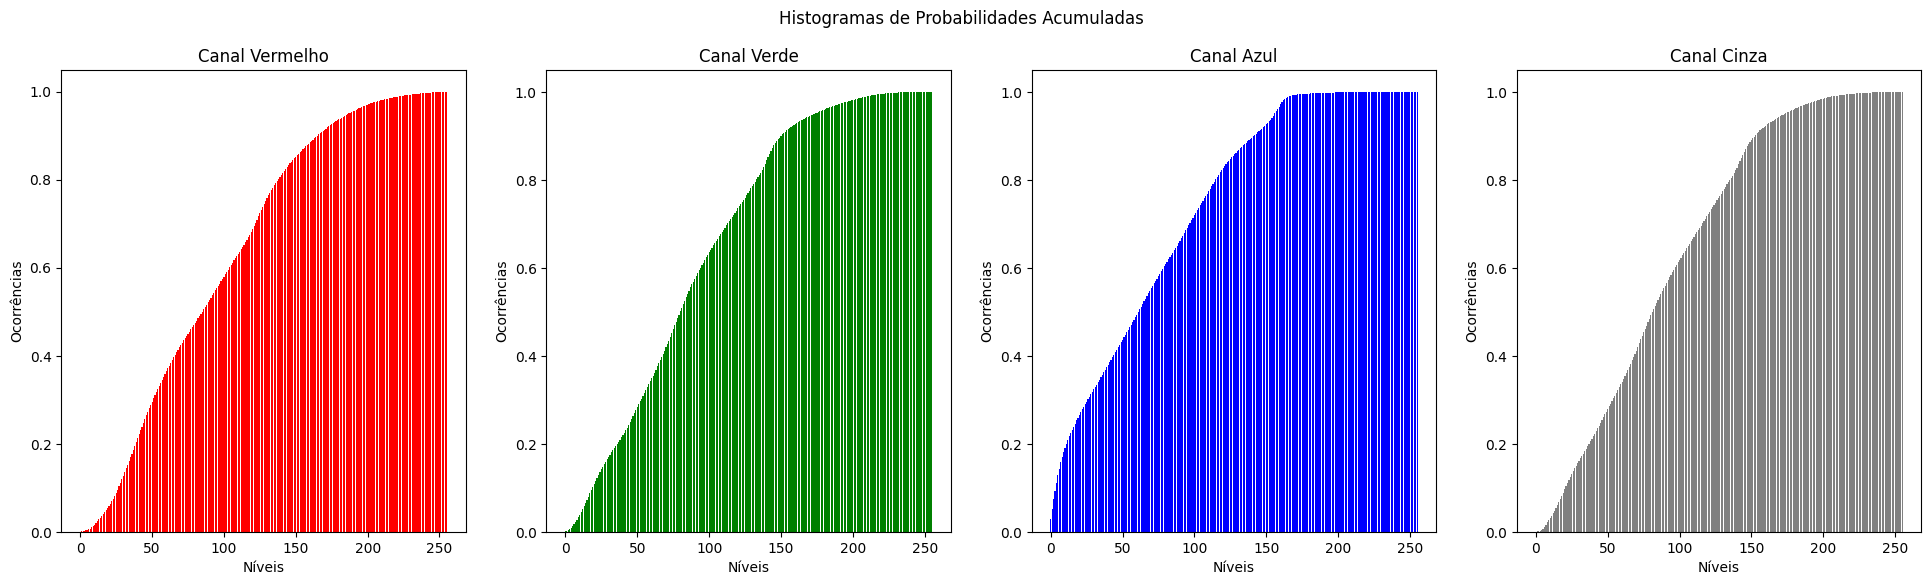

In [14]:
# Para a imagem da capivara
plot_histogramas(img, tipo='b')
plot_histogramas(img, tipo='p')
plot_histogramas(img, tipo='c')

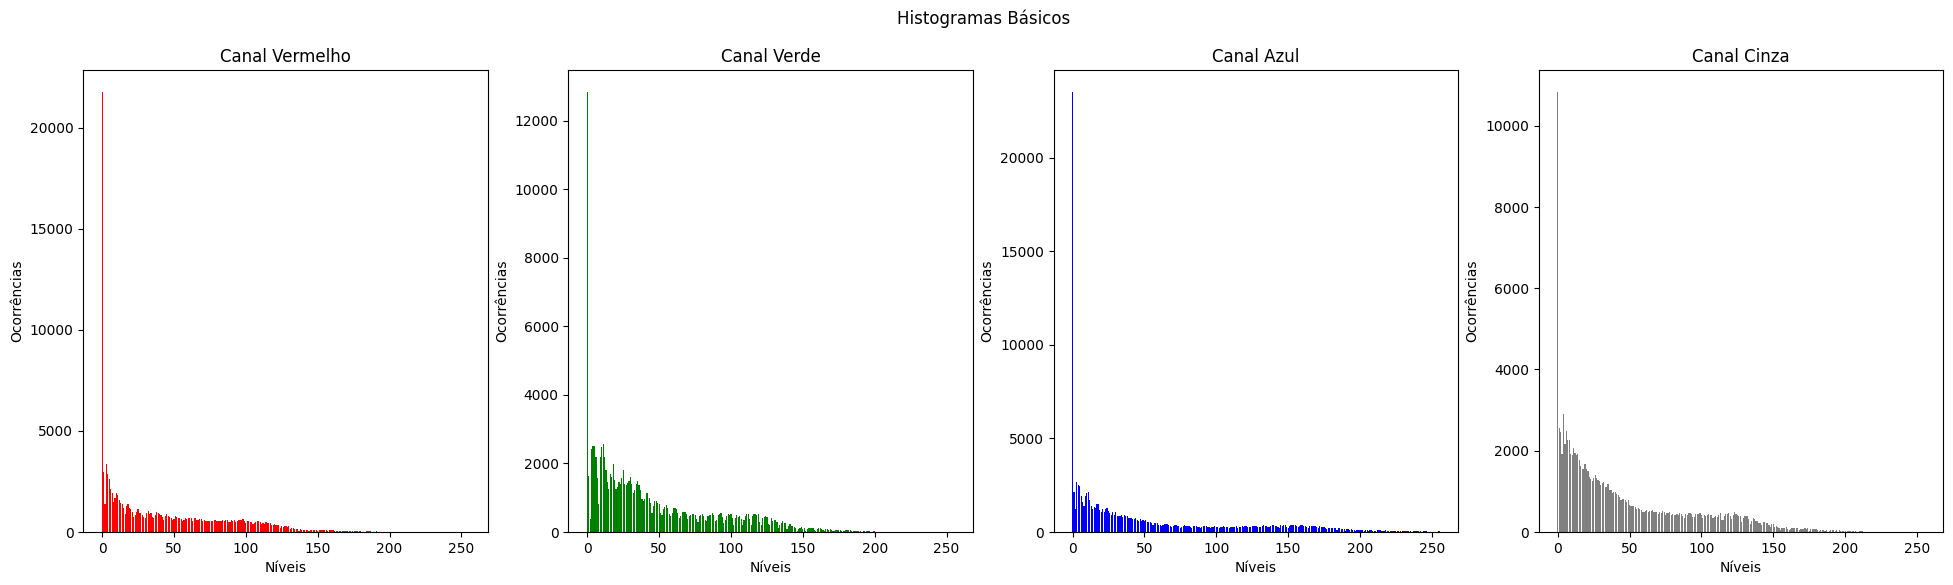

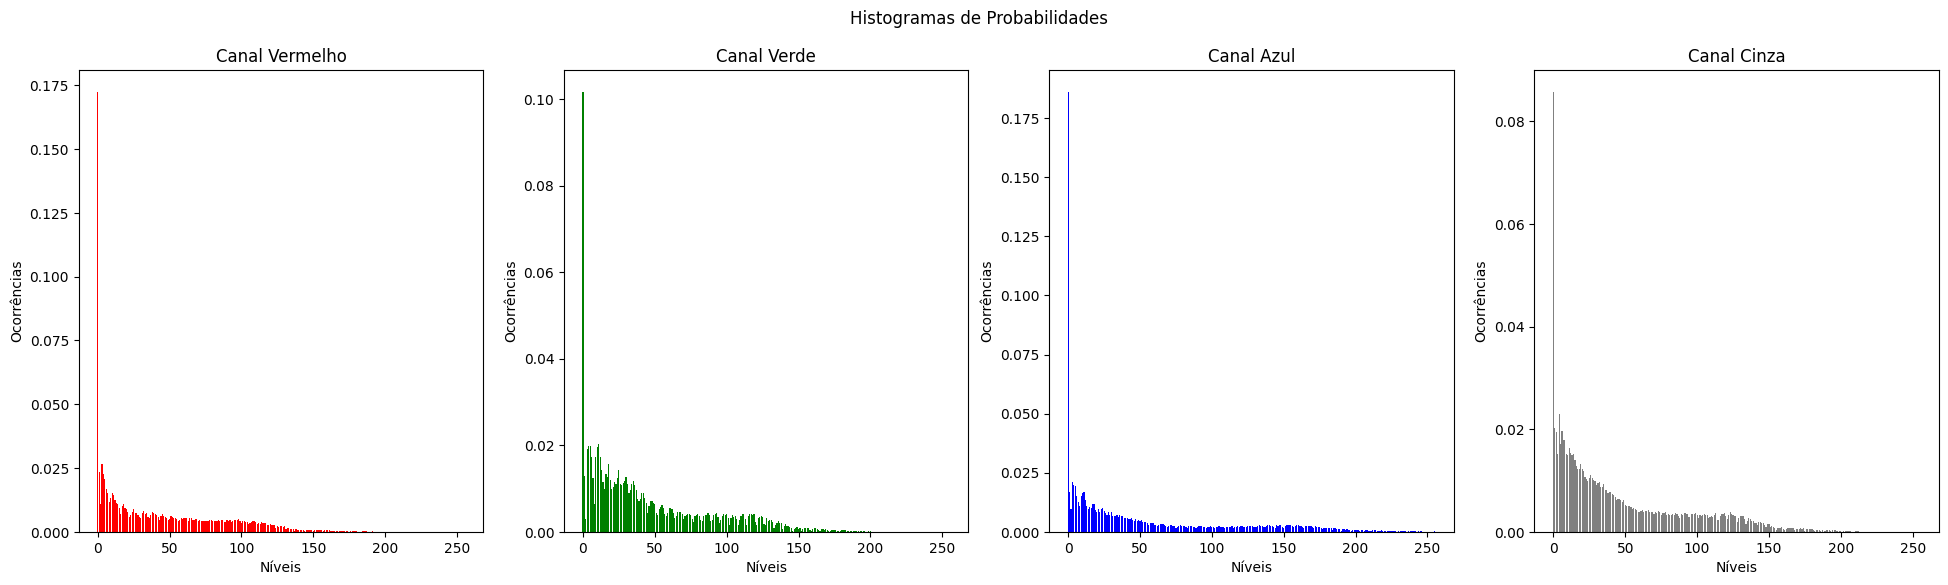

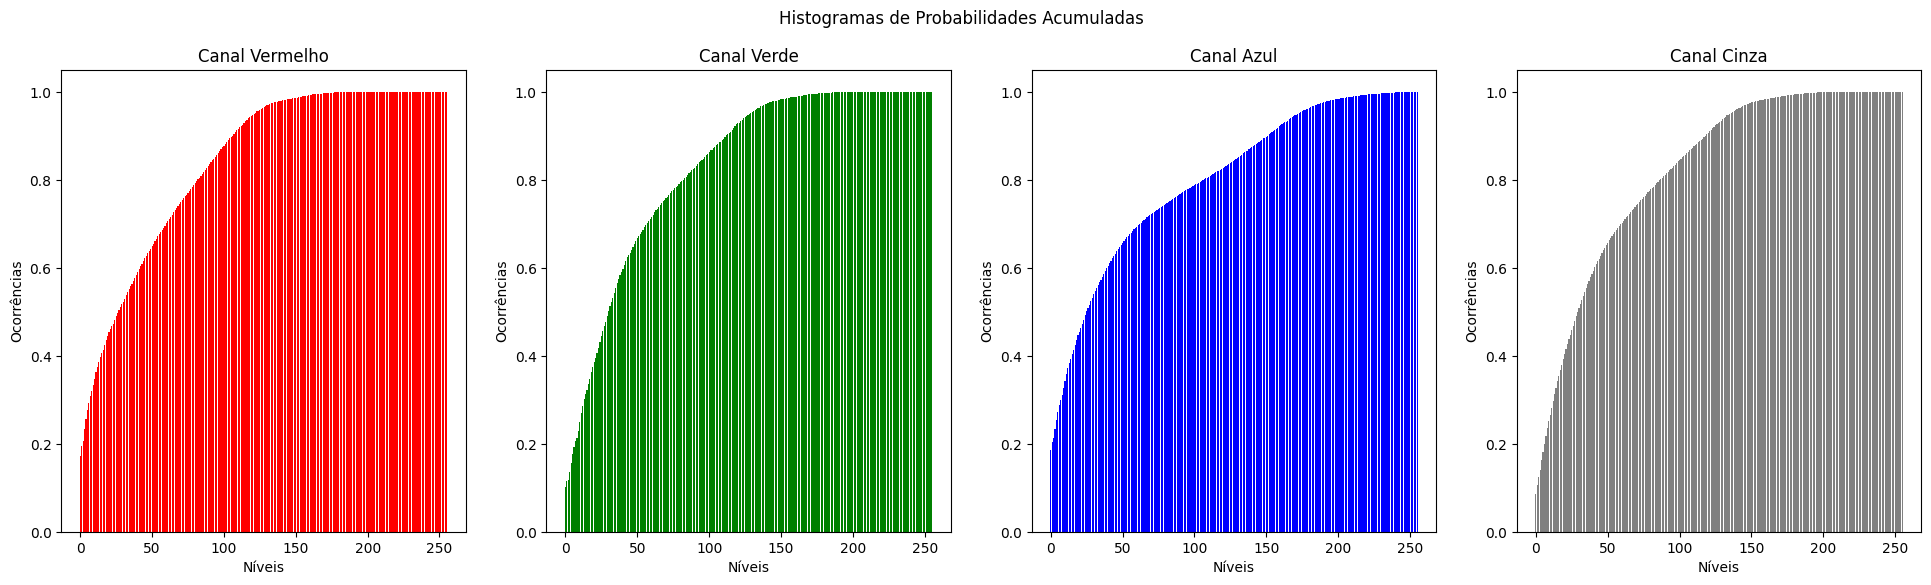

In [15]:
# Para a imagem do mico
img = Image.open('mico.png')
plot_histogramas(img, tipo='b')
plot_histogramas(img, tipo='p')
plot_histogramas(img, tipo='c')

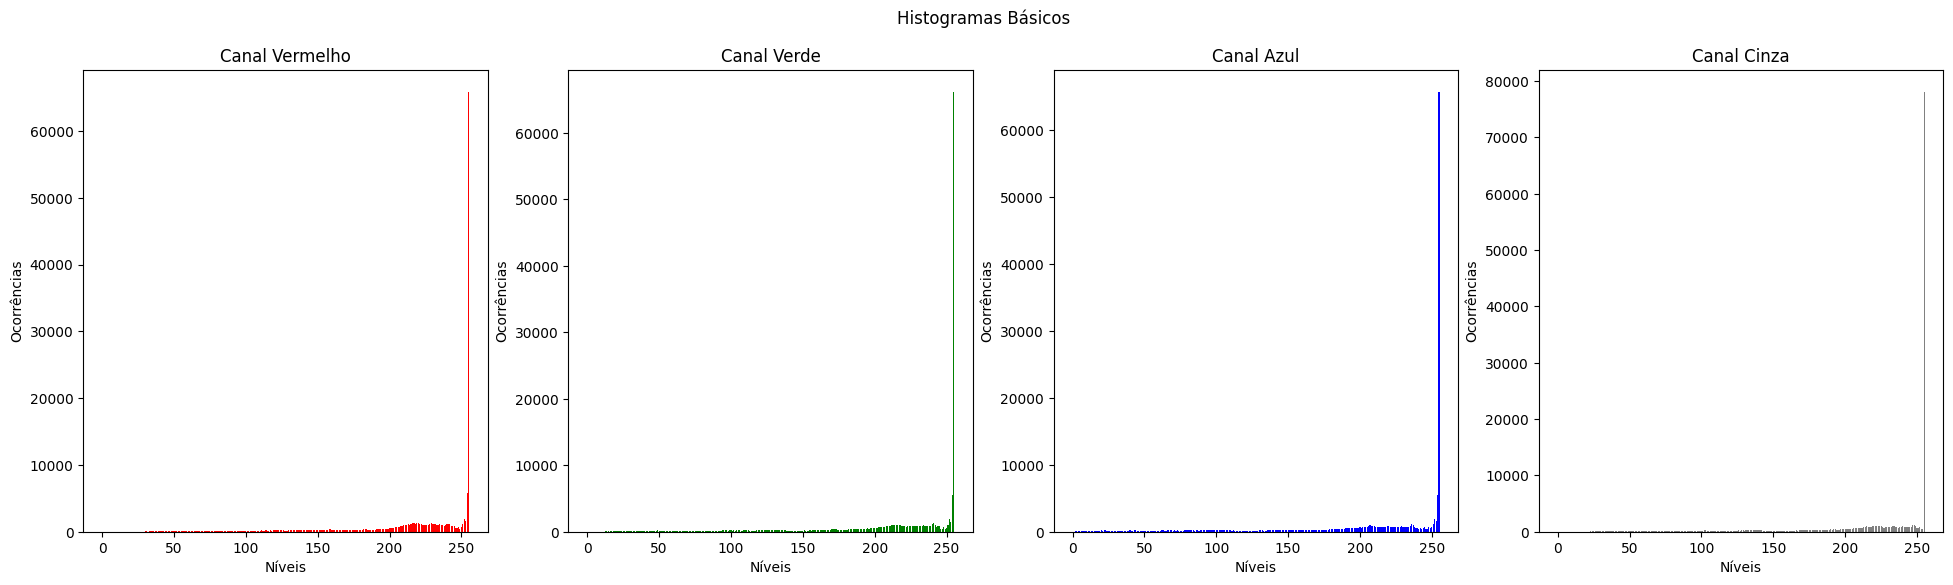

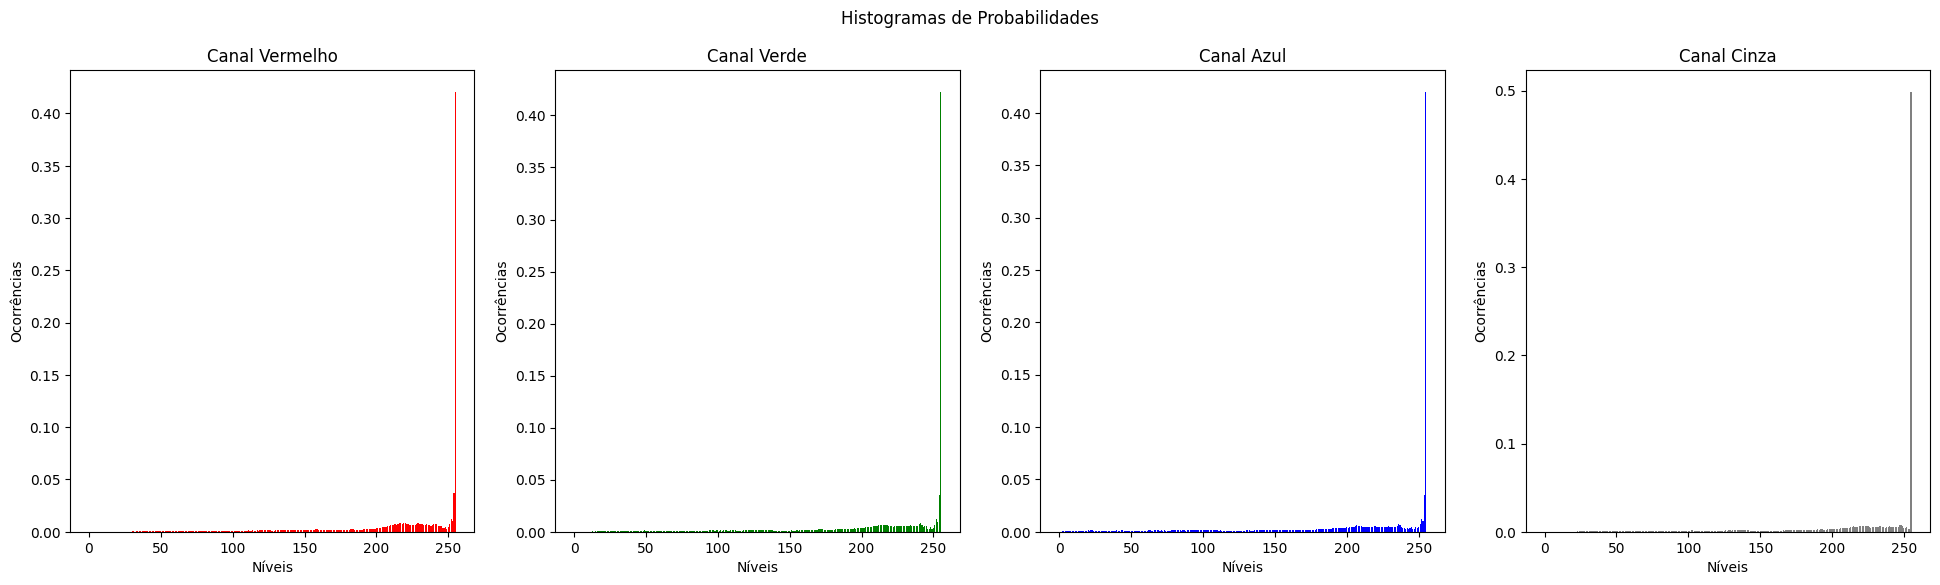

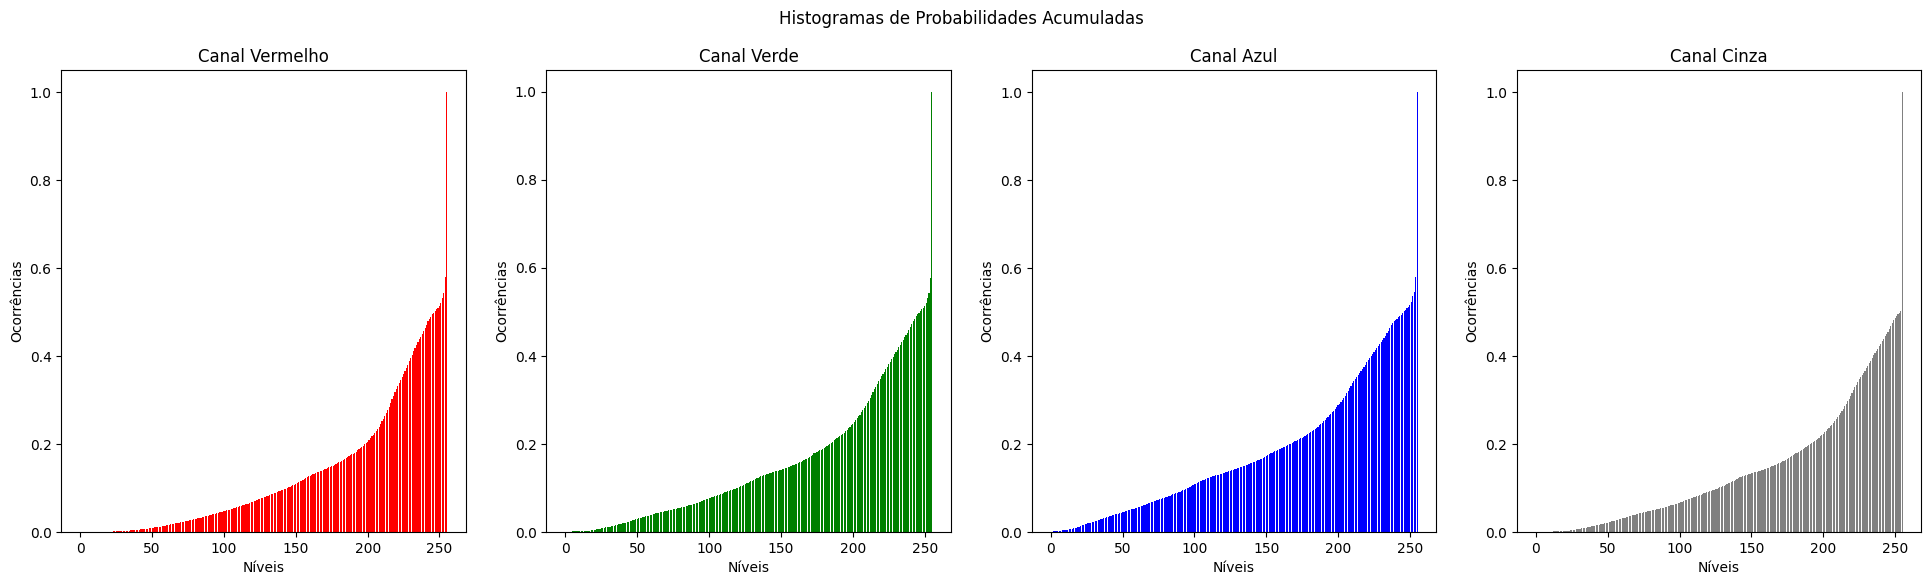

In [16]:
# Para a imagem do coco
img = Image.open('coco.png')
plot_histogramas(img, tipo='b')
plot_histogramas(img, tipo='p')
plot_histogramas(img, tipo='c')